# Description

The knn-dataset folder contains 4 files as follows:
*   **train_data**: numpy array of N training data points x M features
*   **train_labels**: numpy array of N training labels
*   **test_data**: numpy array of N' test data points x M features
*   **test_labels**: numpy array of N' test labels

Each data point is related to one 8x8 greyscale image of a handwritten digit. This modified dataset contains only the similar digits 5, 6, and 8. Each feature represents a count of the number of 0s (black squares) in a sliding 5x5 window over the original image. This doesn't impact the implementation, just noted so that you aren't confused if you plot one of the images. 

Complete the assignment questions by filling out the function templates below. The goal is to determine the optimal hyperparameter (number of neighbours) using 5-fold cross-validation. We will use a hyperperameter range of 1 to 30.
 
 
### Other Considerations:
- You do not need to shuffle the data (including in your CV implementation)
- How could you approach a tie (equal number of neighbours from each classes around an unlabeled datapoint)

**Do not modify the code in the Main KNN Code section. Use only the libraries provided.**  


j337xu@uwaterloo.ca | 20658861 

# Imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [9]:
def load_data():
    train_data = np.genfromtxt('train_data.csv', delimiter=',')
    train_labels = np.genfromtxt('train_labels.csv', delimiter=',')
    test_data = np.genfromtxt('test_data.csv', delimiter=',')
    test_labels = np.genfromtxt('test_labels.csv', delimiter=',')
    return train_data, train_labels, test_data, test_labels

train_data, train_labels, test_data, test_labels = load_data()

# Function: predict_knn

This function uses the KNN classifier to predict the label of a data point.

Inputs:
*   **x**: input data point to predict (numpy array of M features)
*   **inputs**: matrix of neighbouring data points. (numpy array of N data points x M features)
*   **labels**: vector of labels associated with x  (numpy array of N labels)
*   **k_neighbours**: # of nearest neighbours that will be used

Output:
*   **predicted_label**: predicted label (integer)

In [10]:
def predict_knn(x, inputs, labels, k_neighbours):
    predicted_label = 0
    dist_array = [np.sum((x - xi) ** 2) for xi in inputs] # square dist. minimization (for optimization)
    # n_indecies = np.argsort(dist_array) # slower
    n_indecies = np.argpartition(dist_array, k_neighbours) # much faster
    n_indecies = n_indecies[0:k_neighbours]
    predicted_label = np.bincount( np.intc(labels[n_indecies]) ).argmax()
    return predicted_label

# Function: eval_knn

This function evaluates the accuracy of the KNN classifier on a dataset.  The dataset to be evaluated consists of (inputs, labels).  The dataset used to find nearest neighbours consists of (train_data, train_labels).

Inputs:
*   **inputs**: matrix of input data points to be evaluated (numpy array of N data points x M features)
*   **labels**: vector of target labels for the inputs (numpy array of N labels)
*   **train_data**: matrix of input data points in which neighbours will be found (numpy array of N' data points x M features)
*   **train_labels**: vector of labels for the training inputs (numpy array of N' labels)
*   **k_neighbours**: # of nearest neighbours to be used (integer)

Outputs:
*   **accuracy**: percentage of correctly labeled data points




In [11]:
def eval_knn(inputs, labels, train_data, train_labels, k_neighbours):
    accuracy = 0    
    eval_array = [(predict_knn(x, train_data, train_labels, k_neighbours) == y) for x,y in zip(inputs,labels)]
    accuracy = sum(eval_array)/len(eval_array)
    return accuracy

# Function: cross_validation_knn

This function performs k-fold cross validation to determine the best number of neighbours for KNN.

Inputs:
*   **k_folds**: # of folds in cross-validation (integer)
*   **hyperparameters**: list of hyperparameters where each hyperparameter is a different # of neighbours (list of integers)
*   **inputs**: matrix of data points to be used when searching for neighbours (numpy array of N data points by M features)
*   **labels**: vector of labels associated with the inputs (numpy array of N labels)

Outputs:
*   **best_k**: best # of neighbours for KNN (integer)
*   **best_accuracy**: accuracy achieved with best_k (float)
*   **accuracies**: vector of accuracies for the corresponding hyperparameters (numpy array of floats)

In [12]:
def cross_validation_knn(k_folds, hyperparameters, inputs, labels):
    best_k = 0
    best_accuracy = 0
    accuracies = np.zeros(len(hyperparameters))

    ### K-FOLD  ========== ========== ==========
    # divid data into k-portions
    training_pair = list(zip(inputs, labels))
    data_pool = np.array_split(training_pair, k_folds) 

    ### KNN     ========== ========== ==========
    for i, k_neighbours in enumerate(hyperparameters):
        subfold_accuracies = np.zeros(k_folds)
        ## apply k-fold    ========== ==========
        for kf in range(k_folds):
            # construct training set
            train_set = np.concatenate((data_pool[0:kf] + data_pool[kf+1:k_folds]), axis=0)
            # construct validation set
            valid_set = data_pool[kf]
            # decode training data
            tx,ty = zip(*train_set)
            tx,ty = np.array(tx), np.array(ty)
            # decode validation data
            vx,vy = zip(*valid_set)
            vx,vy = np.array(vx), np.array(vy)
            # evaulate accuracy
            subfold_accuracies[kf] = eval_knn(
                inputs=vx, labels=vy,
                train_data=tx, train_labels=ty,
                k_neighbours=k_neighbours
            )
       
        # record avg.
        accuracies[i] = np.average(subfold_accuracies)
    
    # Summary:
    best_k = np.argmax(accuracies)
    best_accuracy = accuracies[best_k]

    return best_k, best_accuracy, accuracies

# Function: plot_knn_accuracies

Function that plots the KNN accuracies for different # of neighbours (hyperparameters) based on cross validation

Inputs:
*   **accuracies**: vector of accuracies for the corresponding hyperparameters (numpy array of floats)
*   **hyperparams**: list of hyperparameters where each hyperparameter is a different # of neighbours (list of integers)


In [13]:
def plot_knn_accuracies(accuracies,hyperparams):
    plt.plot(hyperparams,accuracies)
    plt.ylabel('accuracy')
    plt.xlabel('k neighbours')
    plt.show()  

# Main KNN code (Please do not modify)

Use k-fold cross validation to find the best # of neighbours for KNN.
Plot accuracies for different # of neighbours.
Test KNN with the best # of neighbours.

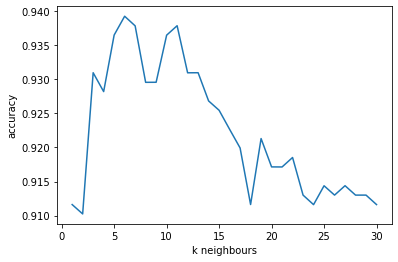

best # of neighbours k: 5
best cross validation accuracy: 0.9392432950191572
test accuracy: 0.9230769230769231


In [14]:
# number of neighbours to be evaluated by cross validation
hyperparams = range(1,31)
k_folds = 5
best_k_neighbours, best_accuracy, accuracies = cross_validation_knn(k_folds, hyperparams, train_data, train_labels)

# plot results
plot_knn_accuracies(accuracies, hyperparams)
print('best # of neighbours k: ' + str(best_k_neighbours))
print('best cross validation accuracy: ' + str(best_accuracy))

# evaluate with best # of neighbours
accuracy = eval_knn(test_data, test_labels, train_data, train_labels, best_k_neighbours)
print('test accuracy: '+ str(accuracy))